# Relations

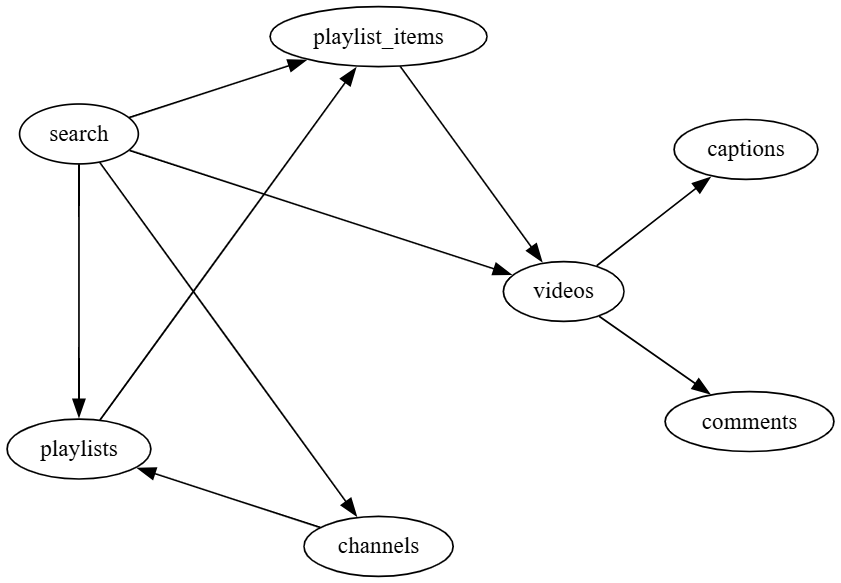

# Setups

In [1]:
import sys
import os

# print(os.path.abspath(os.path.join(os.path.dirname(__file__))))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from constants import video_ids, search_keywords, playlist_ids, channel_ids
from tests.utils import measure_time

import pandas as pd

devKey = open("devKey").read()

## Pipe: `videos` $\rightarrow$ `commentThreads`

In [ ]:
from yt_pipeline.pipeline import Pipeline, PipelineBlock, PipelineStacks
from yt_pipeline.foreman import VideosForeman, CommentThreadsForeman
from yt_pipeline.retriever import RetrieverSettings, PipeSettings

stacks = PipelineStacks(
    initial_input=video_ids,
    blocks=[
        PipelineBlock(
            foreman=VideosForeman(), 
            retriever_settings=RetrieverSettings(output_folder="backup/VideosRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=CommentThreadsForeman(),
            pipe_settings=PipeSettings(retrieval="all", max_page=3),
            retriever_settings=RetrieverSettings(output_folder="backup/CommentThreadsRetriever", multithread=True),
            save_output=True,
            max_workers=16
        )
    ]
)


pipeline = Pipeline(stacks=stacks, developerKey=devKey)
dlv = pipeline.invoke()

In [ ]:
dlv.to_json("test.json")

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(dlv.products[0].shipper.main_records)

In [ ]:
pd.DataFrame(dlv.products[1].shipper.main_records)

## Pipe: `search` $\rightarrow$ `videos`  $\rightarrow$ `commentThreads`

In [ ]:
from yt_pipeline.pipeline import Pipeline, PipelineBlock, PipelineStacks
from yt_pipeline.foreman import SearchForeman, VideosForeman, CommentThreadsForeman
from yt_pipeline.retriever import RetrieverSettings, PipeSettings, SearchParamProps, SearchTypeCheckboxProps

stacks = PipelineStacks(
    initial_input=[
        SearchParamProps(search_keywords[0], channelId='UC84t1K5ri-7u9bFCaUKTXDA', order="relevance"),
        SearchParamProps(search_keywords[0], channelId='UC84t1K5ri-7u9bFCaUKTXDA', videoDuration="long", order="relevance"),
        SearchParamProps(search_keywords[0], channelId='UC84t1K5ri-7u9bFCaUKTXDA', videoDuration="long", order="relevance", 
                        publishedAfter="2023-02-01T13:00:02Z"),
        SearchParamProps(search_keywords[0], channelId='UC84t1K5ri-7u9bFCaUKTXDA', videoCategoryId="19",
                         order="relevance"),
    ],
    blocks=[
        PipelineBlock(
            foreman=SearchForeman(types=SearchTypeCheckboxProps(video=True)), 
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/searchRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=VideosForeman(), 
            retriever_settings=RetrieverSettings(output_folder="backup/VideosRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=CommentThreadsForeman(),
            pipe_settings=PipeSettings(retrieval="all", max_page=3),
            retriever_settings=RetrieverSettings(output_folder="backup/CommentThreadsRetriever", multithread=True),
            save_output=True,
            max_workers=16
        )
    ]
)


pipeline = Pipeline(stacks=stacks, developerKey=devKey)
dlv = pipeline.invoke()

In [ ]:
pd.DataFrame(dlv.products[0].shipper.main_records)

In [ ]:
7pd.DataFrame(dlv.products[1].shipper.main_records)

In [ ]:
pd.DataFrame(dlv.products[2].shipper.main_records)

In [ ]:
dlv.to_json("output.json")

## Pipe: `search` $\rightarrow$ `channels`  $\rightarrow$ `playlists`  $\rightarrow$ `playlists_items`

In [3]:
from yt_pipeline.pipeline import Pipeline, PipelineBlock, PipelineStacks
from yt_pipeline.foreman import SearchForeman, ChannelsForeman, PlaylistsForeman, PlaylistItemsForeman
from yt_pipeline.retriever import RetrieverSettings, PipeSettings, SearchParamProps, SearchTypeCheckboxProps

stacks = PipelineStacks(
    initial_input=[SearchParamProps(q=kw, order="relevance") for kw in search_keywords[:1]],
    blocks=[
        PipelineBlock(
            foreman=SearchForeman(types=SearchTypeCheckboxProps(channel=True)), 
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/SearchRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=ChannelsForeman(), 
            retriever_settings=RetrieverSettings(output_folder="backup/ChannelsRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=PlaylistsForeman(), 
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/PlaylistsRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=PlaylistItemsForeman(),
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/PlaylistItemsRetriever", multithread=True),
            save_output=True,
            max_workers=8
        )
    ]
)


pipeline = Pipeline(stacks=stacks, developerKey=devKey)
pipeline._validate_stacks()
# dlv = pipeline.invoke()

AttributeError: 'Pipeline' object has no attribute '_validate_stacks'

In [ ]:
pd.DataFrame(dlv.products[0].shipper.main_records)

In [ ]:
pd.DataFrame(dlv.products[1].shipper.main_records)

In [ ]:
pd.DataFrame(dlv.products[2].shipper.main_records)

In [ ]:
pd.DataFrame(dlv.products[3].shipper.main_records)

In [ ]:
dlv.to_json("output.json")

## Pipe: `search` $\rightarrow$ `playlists` $\rightarrow$ `playlists_items`

In [ ]:
from yt_pipeline.pipeline import Pipeline, PipelineBlock, PipelineStacks
from yt_pipeline.foreman import SearchForeman, PlaylistsForeman, PlaylistItemsForeman
from yt_pipeline.retriever import RetrieverSettings, PipeSettings, SearchParamProps, SearchTypeCheckboxProps

stacks = PipelineStacks(
    initial_input=[SearchParamProps(q=kw, order="relevance") for kw in search_keywords[:1]],
    blocks=[
        PipelineBlock(
            foreman=SearchForeman(types=SearchTypeCheckboxProps(channel=True)), 
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/SearchRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=PlaylistsForeman(), 
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/PlaylistsRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=PlaylistItemsForeman(),
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/PlaylistItemsRetriever", multithread=True),
            save_output=True,
            max_workers=8
        )
    ]
)


pipeline = Pipeline(stacks=stacks, developerKey=devKey)
dlv = pipeline.invoke()

## Pipe: `playlists_items` $\rightarrow$ `videos`  $\rightarrow$ `commentThreads`

In [ ]:
from yt_pipeline.pipeline import Pipeline, PipelineBlock, PipelineStacks
from yt_pipeline.foreman import PlaylistsForeman, PlaylistItemsForeman, VideosForeman, CommentThreadsForeman
from yt_pipeline.retriever import RetrieverSettings, PipeSettings, SearchParamProps, SearchTypeCheckboxProps

stacks = PipelineStacks(
    initial_input=playlist_ids[:10],
    blocks=[
        PipelineBlock(
            foreman=PlaylistItemsForeman(),
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/PlaylistItemsRetriever", multithread=True),
            save_output=True,
            max_workers=8
        ),
        PipelineBlock(
            foreman=VideosForeman(), 
            retriever_settings=RetrieverSettings(output_folder="backup/VideosRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=CommentThreadsForeman(),
            pipe_settings=PipeSettings(retrieval="all", max_page=1),
            retriever_settings=RetrieverSettings(output_folder="backup/CommentThreadsRetriever", multithread=True),
            save_output=True,
            max_workers=8
        )
    ]
)


pipeline = Pipeline(stacks=stacks, developerKey=devKey)
dlv = pipeline.invoke()

## Pipe: `videos`  $\rightarrow$ `captions`

In [ ]:
from yt_pipeline.pipeline import Pipeline, PipelineBlock, PipelineStacks
from yt_pipeline.foreman import VideosForeman, CaptionsForeman
from yt_pipeline.retriever import RetrieverSettings, PipeSettings, SearchParamProps, SearchTypeCheckboxProps

stacks = PipelineStacks(
    initial_input=video_ids[:10],
    blocks=[
        PipelineBlock(
            foreman=VideosForeman(), 
            retriever_settings=RetrieverSettings(output_folder="backup/VideosRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=CaptionsForeman(),
            retriever_settings=RetrieverSettings(output_folder="backup/CommentThreadsRetriever", multithread=True),
            save_output=True,
            max_workers=8
        )
    ]
)


pipeline = Pipeline(stacks=stacks, developerKey=devKey)
dlv = pipeline.invoke()

In [ ]:
dlv.products[1].shipper.main_records

## Invalid Pipe flow: `videos` $\rightarrow$ `channels`

In [ ]:
from yt_pipeline.pipeline import Pipeline, PipelineBlock, PipelineStacks
from yt_pipeline.foreman import VideosForeman, ChannelsForeman
from yt_pipeline.retriever import RetrieverSettings, PipeSettings

stacks = PipelineStacks(
    initial_input=video_ids[:10],
    blocks=[
        PipelineBlock(
            foreman=VideosForeman(), 
            retriever_settings=RetrieverSettings(output_folder="backup/VideosRetriever", multithread=True),
            save_output=True,
            max_workers=16,
        ),
        PipelineBlock(
            foreman=ChannelsForeman(),
            retriever_settings=RetrieverSettings(output_folder="backup/CommentThreadsRetriever", multithread=True),
            save_output=True,
            max_workers=8
        )
    ]
)


pipeline = Pipeline(stacks=stacks, developerKey=devKey)
dlv = pipeline.invoke()